In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

# Bank Loan Analysis Report

In [2]:
df = pd.read_excel('financial_loan_data_excel.xlsx')

In [3]:
df.groupby('loan_status').nunique()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
loan_status,,,,,,,,,,,,,,,,,,,,,
Charged Off,5333,47,1,11,4552,7,4,55,82,98,...,35,2,3,1180,2174,4139,330,476,65,4466
Current,1098,43,1,11,1038,7,3,10,8,4,...,31,1,3,377,870,834,68,251,57,1068
Fully Paid,32145,50,1,11,24015,7,5,63,107,102,...,35,2,3,4449,2821,13148,360,826,80,17236


### Metadata of Data

In [4]:
print('Number of rows: ', df.shape[0])

Number of rows:  38576


In [5]:
print('Number of columns: ', df.shape[1])

Number of columns:  24


In [6]:
df.info

<bound method DataFrame.info of             id address_state application_type emp_length  \
0      1077430            GA       INDIVIDUAL   < 1 year   
1      1072053            CA       INDIVIDUAL    9 years   
2      1069243            CA       INDIVIDUAL    4 years   
3      1041756            TX       INDIVIDUAL   < 1 year   
4      1068350            IL       INDIVIDUAL  10+ years   
...        ...           ...              ...        ...   
38571   803452            NJ       INDIVIDUAL   < 1 year   
38572   970377            NY       INDIVIDUAL    8 years   
38573   875376            CA       INDIVIDUAL    5 years   
38574   972997            NY       INDIVIDUAL    5 years   
38575   682952            NY       INDIVIDUAL    4 years   

                             emp_title grade home_ownership issue_date  \
0                                Ryder     C           RENT 2021-02-11   
1                       MKC Accounting     E           RENT 2021-01-01   
2                Chemat T

### Data types

In [7]:
df.dtypes

id                                int64
address_state                    object
application_type                 object
emp_length                       object
emp_title                        object
grade                            object
home_ownership                   object
issue_date               datetime64[ns]
last_credit_pull_date    datetime64[ns]
last_payment_date        datetime64[ns]
loan_status                      object
next_payment_date        datetime64[ns]
member_id                         int64
purpose                          object
sub_grade                        object
term                             object
verification_status              object
annual_income                   float64
dti                             float64
installment                     float64
int_rate                        float64
loan_amount                       int64
total_acc                         int64
total_payment                     int64
dtype: object

In [8]:
df.describe()

,id,issue_date,last_credit_pull_date,last_payment_date,next_payment_date,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,38576,38576,38576,38576,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,2021-07-16 02:31:35.562007040,2021-06-08 13:36:34.193280512,2021-06-26 09:52:08.909166080,2021-07-26 20:42:20.605557760,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
min,5.473400e+04,2021-01-01 00:00:00,2021-01-08 00:00:00,2021-01-08 00:00:00,2021-02-08 00:00:00,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,2021-04-11 00:00:00,2021-04-15 00:00:00,2021-03-16 00:00:00,2021-04-16 00:00:00,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,2021-07-11 00:00:00,2021-05-16 00:00:00,2021-06-14 00:00:00,2021-07-14 00:00:00,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,2021-10-11 00:00:00,2021-08-13 00:00:00,2021-09-15 00:00:00,2021-10-15 00:00:00,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,2021-12-12 00:00:00,2022-01-20 00:00:00,2021-12-15 00:00:00,2022-01-15 00:00:00,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000
std,2.113246e+05,NaN,NaN,NaN,NaN,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777


### LOAN APPLICATIONS

In [9]:
total_loan_applications = df['id'].count()
print('Total_loan_applications: ',total_loan_applications)

MTD_total_loan_applications = df[df['issue_date'].dt.month== 12]['issue_date'].count()
print('MTD_total_loan_applications: ',MTD_total_loan_applications)

PMTD_total_loan_applications = df[df['issue_date'].dt.month== 11]['issue_date'].count()
print('PMTD_total_loan_applications: ',PMTD_total_loan_applications)



Total_loan_applications:  38576
MTD_total_loan_applications:  4314
PMTD_total_loan_applications:  4035


### FUNDED AMOUNT

In [10]:
Total_funded_amount = df['loan_amount'].sum() / 1000000
print(f'Total_funded_amount(in Millions): ${Total_funded_amount: .2f}M')

MTD_Total_funded_amount = df[df['issue_date'].dt.month == 12]['loan_amount'].sum() / 1000000
print(f'MTD_Total_funded_amount(in Millions): ${MTD_Total_funded_amount:.2f}M')

PMTD_Total_funded_amount = df[df['issue_date'].dt.month == 11]['loan_amount'].sum() / 1000000
print(f'PMTD_Total_funded_amount(in Millions): ${PMTD_Total_funded_amount:.2f}M')

Total_funded_amount(in Millions): $ 435.76M
MTD_Total_funded_amount(in Millions): $53.98M
PMTD_Total_funded_amount(in Millions): $47.75M


### RECEIVED AMOUNT

In [11]:
Total_received_amount = df['total_payment'].sum() / 1000000
print(f'Total_received_amount(in Millions): ${Total_received_amount:.2f}M')

MTD_Total_received_amount = df[df['issue_date'].dt.month == 12]['total_payment'].sum() / 1000000
print(f'MTD_Total_received_amount(in Millions): ${MTD_Total_received_amount:.2f}M')

PMTD_Total_received_amount = df[df['issue_date'].dt.month == 11]['total_payment'].sum() / 1000000
print(f'PMTD_Total_received_amount(in Millions): ${PMTD_Total_received_amount:.2f}M')


Total_received_amount(in Millions): $473.07M
MTD_Total_received_amount(in Millions): $58.07M
PMTD_Total_received_amount(in Millions): $50.13M


### INTEREST RATE

In [12]:
Average_interest_rate = (df['int_rate'].mean() * 100).round(2)
print(f'Average_interest_rate: {Average_interest_rate}%')

MTD_Average_interest_rate = (df[df['issue_date'].dt.month==12]['int_rate'].mean() * 100).round(2)
print(f'MTD_Average_interest_rate: {MTD_Average_interest_rate}%')

PMTD_Average_interest_rate = (df[df['issue_date'].dt.month==11]['int_rate'].mean() * 100).round(2)
print(f'PMTD_Average_interest_rate: {PMTD_Average_interest_rate}%')

Average_interest_rate: 12.05%
MTD_Average_interest_rate: 12.36%
PMTD_Average_interest_rate: 11.94%


### DTI

In [13]:
Average_DTI = round(df['dti'].mean() * 100,2)
print(f'Average_DTI: {Average_DTI}%')

MTD_Average_DTI = round(df[df['issue_date'].dt.month==12]['dti'].mean() * 100,2)
print(f'MTD_Average_DTI: {MTD_Average_DTI}%')

PMTD_Average_DTI = round(df[df['issue_date'].dt.month==11]['dti'].mean() * 100,2)
print(f'PMTD_Average_DTI: {PMTD_Average_DTI}%')

Average_DTI: 13.33%
MTD_Average_DTI: 13.67%
PMTD_Average_DTI: 13.3%


### GOOD LOAN KPI

In [14]:
good_loan = df[(df['loan_status'] == 'Fully Paid') | (df['loan_status'] == 'Current')]

good_loan_percentage = round(good_loan['id'].count() / df['id'].count() * 100,2)
print(f'good_loan_percentage: {good_loan_percentage}%' )

good_loan_total_applications = good_loan['id'].count()
print('good_loan_total_applications: ',good_loan_total_applications)

good_loan_total_fund = good_loan['loan_amount'].sum() / 1000000
print(f'good_loan_total_fund(in Millions): ${good_loan_total_fund:.2f}M')

good_loan_total_receive = good_loan['total_payment'].sum() / 1000000
print(f'good_loan_total_receive(in Millions): ${good_loan_total_receive:.2f}M ')

good_loan_percentage: 86.18%
good_loan_total_applications:  33243
good_loan_total_fund(in Millions): $370.22M
good_loan_total_receive(in Millions): $435.79M 


### BAD LOAN KPI

In [15]:
bad_loan = df[df['loan_status'] == 'Charged Off']

bad_loan_percentage = round(bad_loan['id'].count() / df['id'].count() * 100,2)
print(f'bad_loan_percentage:{ bad_loan_percentage}%')

bad_loan_total_applications = bad_loan['id'].count()
print('bad_loan_total_applications: ',bad_loan_total_applications)

bad_loan_total_fund = bad_loan['loan_amount'].sum() / 1000000
print(f'bad_loan_total_fund(in Millions): ${bad_loan_total_fund:.2f}M')

bad_loan_total_receive = bad_loan['total_payment'].sum() / 1000000
print(f'bad_loan_total_receive(in Millions): ${bad_loan_total_receive:.2f}M')

bad_loan_percentage:13.82%
bad_loan_total_applications:  5333
bad_loan_total_fund(in Millions): $65.53M
bad_loan_total_receive(in Millions): $37.28M


In [16]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


### MONTHLY TREND BY ISSUE DATE FOR TOTAL FUNDED AMOUNT

In [17]:
df['month_str'] = df['issue_date'].dt.strftime('%b %Y')

monthly_total_funded = df.sort_values('issue_date').groupby('month_str',sort = False)['loan_amount'].sum().div(1_000_000).round(2).reset_index(name = 'loan_amount_millions')


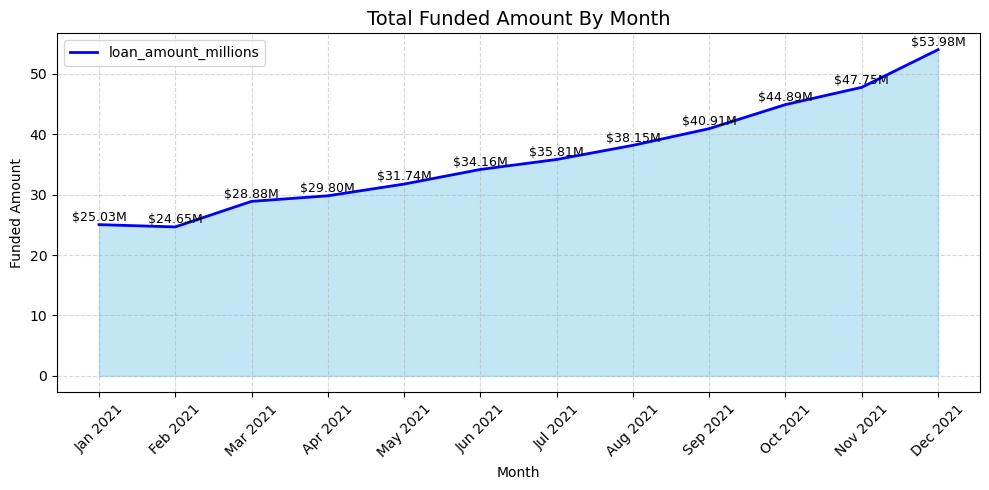

In [18]:
monthly_total_funded.plot(figsize = (10,5),color = 'blue', lw = 2).plot()
plt.fill_between(monthly_total_funded['month_str'], monthly_total_funded['loan_amount_millions'], color = 'skyblue', alpha = 0.5)

for i, row in monthly_total_funded.iterrows():
    plt.text(i, row['loan_amount_millions'] + 0.1, f'${row['loan_amount_millions']:.2f}M', 
             ha = 'center', va = 'bottom', fontsize = 9, rotation = 0, color = 'black')
plt.title('Total Funded Amount By Month', fontsize = 14)
plt.xlabel('Month')
plt.ylabel('Funded Amount')
plt.xticks(ticks=range(len(monthly_total_funded)),labels= monthly_total_funded['month_str'],rotation = 45)
plt.grid(True, alpha = 0.5, ls = '--')
plt.tight_layout()
plt.show()


### MONTHLY TREND BY ISSUE DATE FOR TOTAL RECEIVED AMOUNT

In [19]:
monthly_total_received = df.sort_values('issue_date').groupby('month_str',sort = False)['total_payment'].sum().div(1_000_000).round(2).reset_index(name = 'received_amount_millions')

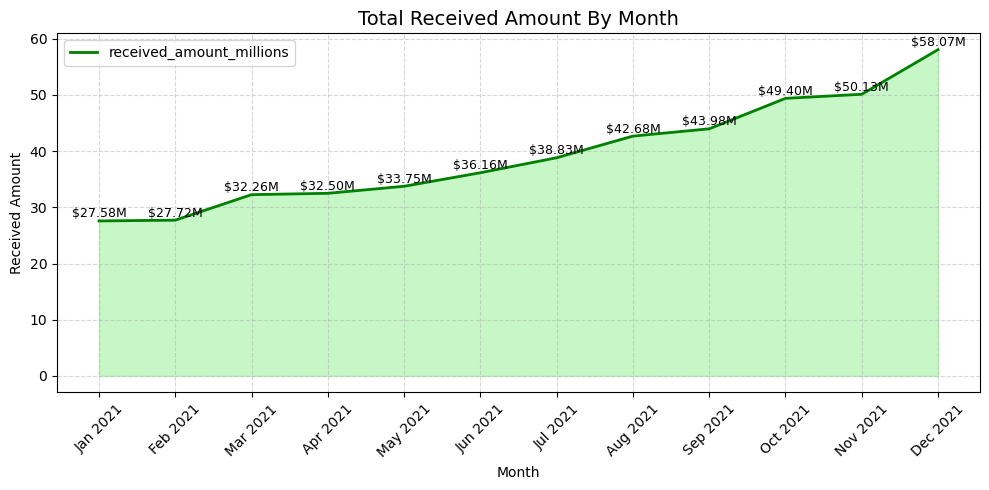

In [20]:
monthly_total_received.plot(figsize = (10,5),color = 'green', lw = 2).plot()
plt.fill_between(monthly_total_received['month_str'], monthly_total_received['received_amount_millions'], color = 'lightgreen', alpha = 0.5)

for i, row in monthly_total_received.iterrows():
    plt.text(i, row['received_amount_millions'] + 0.1, f'${row['received_amount_millions']:.2f}M', 
             ha = 'center', va = 'bottom', fontsize = 9, rotation = 0, color = 'black')
plt.title('Total Received Amount By Month', fontsize = 14)
plt.xlabel('Month')
plt.ylabel('Received Amount')
plt.xticks(ticks=range(len(monthly_total_received)),labels= monthly_total_received['month_str'],rotation = 45)
plt.grid(True, alpha = 0.5, ls = '--')
plt.tight_layout()
plt.show()

### MONTHLY TREND BY ISSUE DATE FOR TOTAL LOAN APPLICATIONS

In [21]:
monthly_total_applications = df.sort_values('issue_date').groupby('month_str',sort = False)['id'].count().reset_index(name = 'applications_amount')


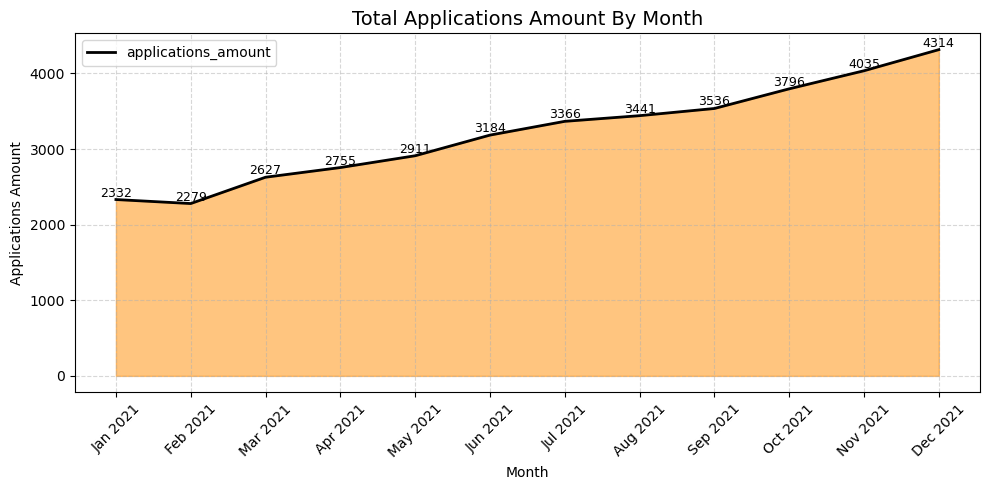

In [22]:
monthly_total_applications.plot(figsize = (10,5),color = 'black', lw = 2).plot()
plt.fill_between(monthly_total_applications['month_str'], monthly_total_applications['applications_amount'], color = 'darkorange', alpha = 0.5)

for i, row in monthly_total_applications.iterrows():
    plt.text(i, row['applications_amount'] + 0.1, row['applications_amount'], 
             ha = 'center', va = 'bottom', fontsize = 9, rotation = 0, color = 'black')
plt.title('Total Applications Amount By Month', fontsize = 14)
plt.xlabel('Month')
plt.ylabel('Applications Amount')
plt.xticks(ticks=range(len(monthly_total_applications)),labels= monthly_total_applications['month_str'],rotation = 45)
plt.grid(True, alpha = 0.5, ls = '--')
plt.tight_layout()
plt.show()

### REGIONAL ANALYSIS BY STATE FOR TOTAL FUNDED AMOUNT

Text(0.5, 80.7222222222222, 'loan amount (in thousand)')

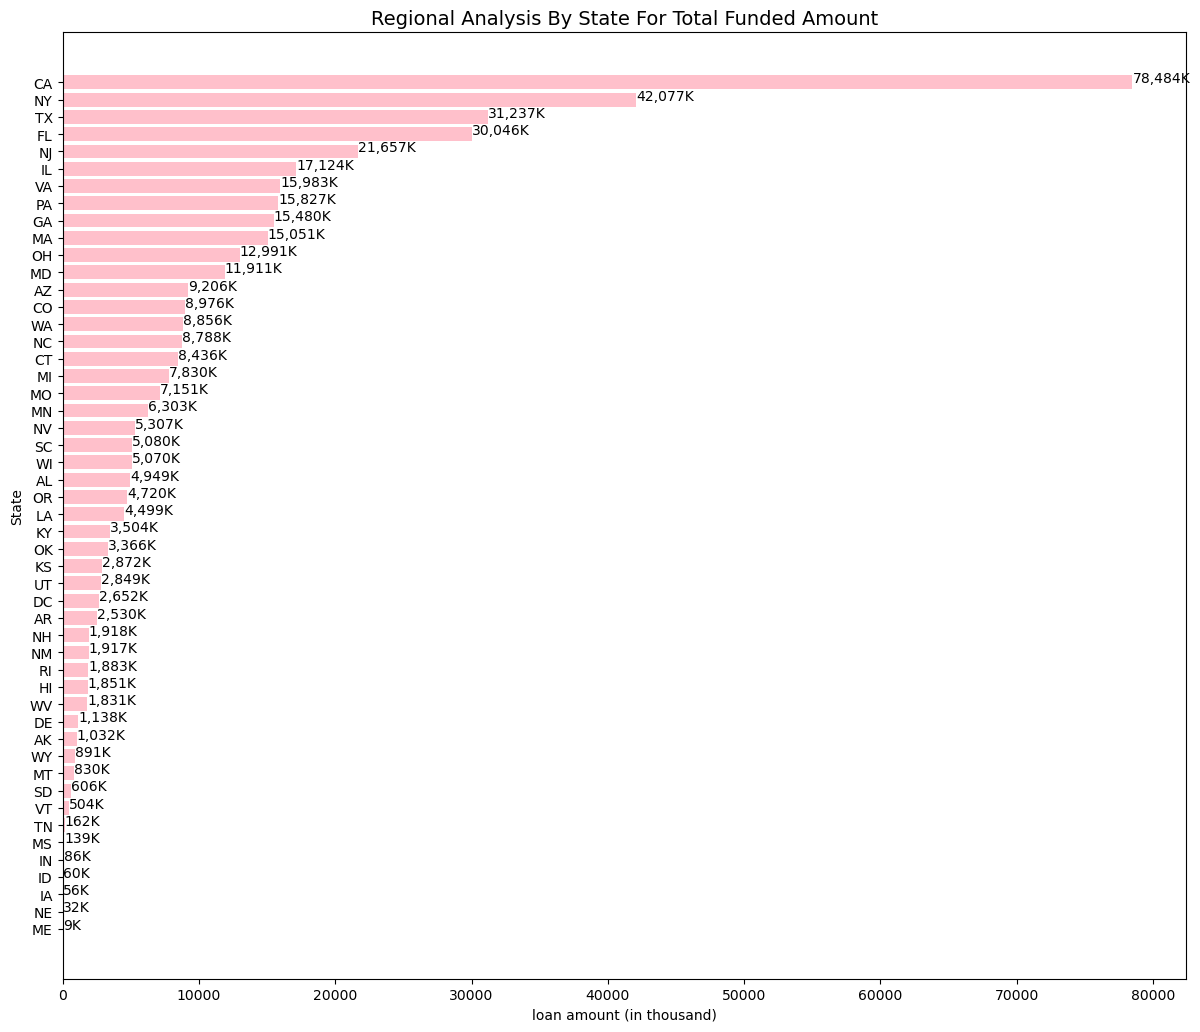

In [23]:
total_funded_state = df.groupby('address_state')['loan_amount'].sum().div(1000).sort_values(ascending = True).reset_index(name = 'total_funded_amount')

fig, ax = plt.subplots(figsize = (12,10))
ax.barh(total_funded_state['address_state'], total_funded_state['total_funded_amount'], color = 'pink')

for i,row in enumerate(total_funded_state['total_funded_amount']):
    plt.text(row ,i, f'{row:,.0f}K')
plt.tight_layout()
plt.title('Regional Analysis By State For Total Funded Amount', fontsize = 14)
plt.ylabel('State')
plt.xlabel('loan amount (in thousand)')


Text(0.5, 80.7222222222222, 'payment amount (in thousand)')

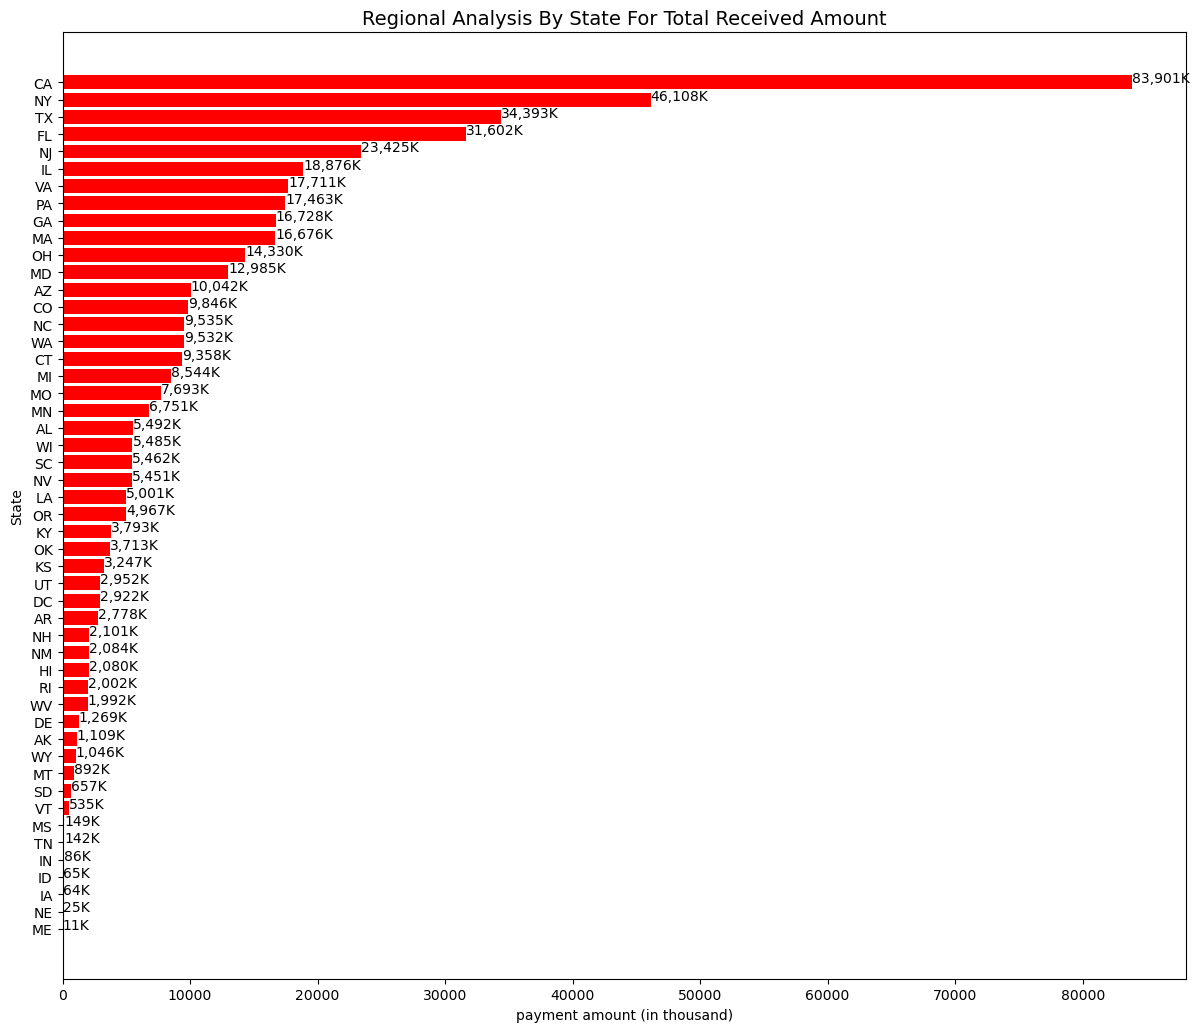

In [24]:
total_received_state = df.groupby('address_state')['total_payment'].sum().div(1000).sort_values(ascending = True).reset_index(name = 'total_received_amount')

fig, ax = plt.subplots(figsize = (12,10))
ax.barh(total_received_state['address_state'], total_received_state['total_received_amount'], color = 'red')

for i,row in enumerate(total_received_state['total_received_amount']):
    plt.text(row ,i, f'{row:,.0f}K')
plt.tight_layout()
plt.title('Regional Analysis By State For Total Received Amount', fontsize = 14)
plt.ylabel('State')
plt.xlabel('payment amount (in thousand)')

Text(0.5, 80.7222222222222, 'Applications amount')

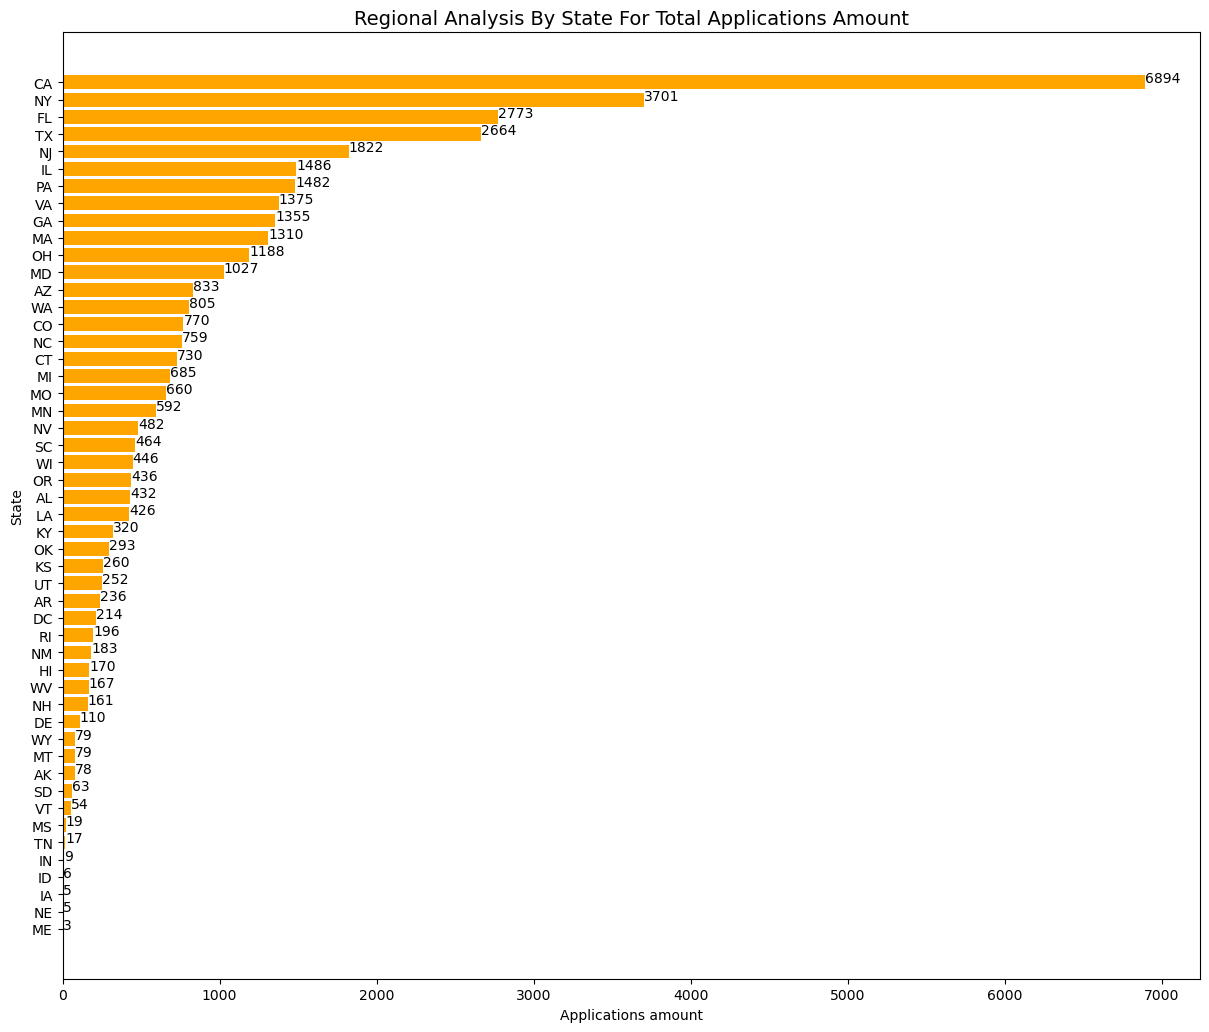

In [25]:
total_applications_state = df.groupby('address_state')['id'].count().sort_values(ascending = True).reset_index(name = 'total_applications')

fig, ax = plt.subplots(figsize = (12,10))
ax.barh(total_applications_state['address_state'], total_applications_state['total_applications'], color = 'orange')

for i,row in enumerate(total_applications_state['total_applications']):
    plt.text(row ,i, row)
plt.tight_layout()
plt.title('Regional Analysis By State For Total Applications Amount', fontsize = 14)
plt.ylabel('State')
plt.xlabel('Applications amount')

### LOAN TERM ANALYSIS BY TOTAL FUNDED AMOUNT

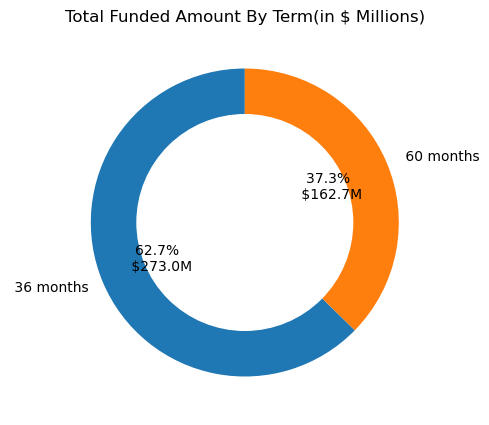

In [26]:
loan_term_funded_amount = df.groupby('term')['loan_amount'].sum().div(1000000).reset_index(name = 'total_fund')

fig, ax = plt.subplots(figsize = (5,5))
ax = plt.pie( loan_term_funded_amount['total_fund'], labels=loan_term_funded_amount['term'],
            autopct=lambda p: f'{p:.1f}% \n ${p*sum(loan_term_funded_amount['total_fund']) / 100:.1f}M',startangle=90, wedgeprops={'width':0.4})

plt.gca().add_artist(plt.Circle((0,0), .7, color = 'white'))
plt.title('Total Funded Amount By Term(in $ Millions)')
plt.show()

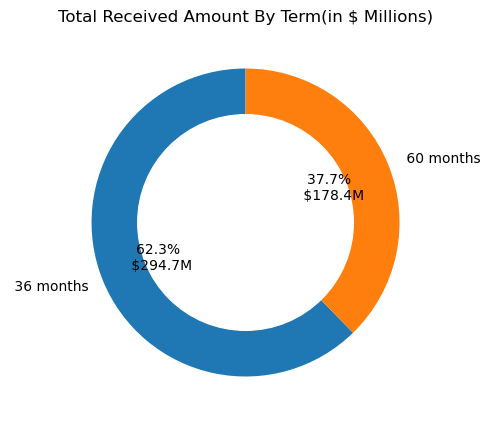

In [27]:
loan_term_received_amount = df.groupby('term')['total_payment'].sum().div(1000000).reset_index(name = 'total_receive')

fig, ax = plt.subplots(figsize = (5,5))
ax = plt.pie( loan_term_received_amount['total_receive'], labels=loan_term_received_amount['term'],
            autopct=lambda p: f'{p:.1f}% \n ${p*sum(loan_term_received_amount['total_receive']) / 100:.1f}M',startangle=90, wedgeprops={'width':0.4})

plt.gca().add_artist(plt.Circle((0,0), .7, color = 'white'))
plt.title('Total Received Amount By Term(in $ Millions)')
plt.show()

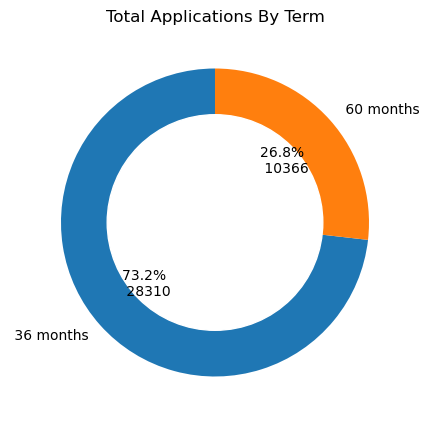

In [28]:
loan_term_applications = df.groupby('term')['id'].count().reset_index(name = 'total_applications')

fig, ax = plt.subplots(figsize = (5,5))
ax = plt.pie( loan_term_applications['total_applications'], labels=loan_term_applications['term'],
            autopct=lambda p: f'{p:.1f}% \n {round(p*sum(loan_term_applications['total_applications']/ 100,1))}',startangle=90, wedgeprops={'width':0.4})

plt.gca().add_artist(plt.Circle((0,0), .7, color = 'white'))
plt.title('Total Applications By Term')
plt.show()

In [29]:
df.columns

Index(['id', 'address_state', 'application_type', 'emp_length', 'emp_title',
       'grade', 'home_ownership', 'issue_date', 'last_credit_pull_date',
       'last_payment_date', 'loan_status', 'next_payment_date', 'member_id',
       'purpose', 'sub_grade', 'term', 'verification_status', 'annual_income',
       'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc',
       'total_payment', 'month_str'],
      dtype='object')

### EMPLOYEE LENGTH BY TOTAL FUNDED AMOUNT

Text(0.5, 25.722222222222214, 'loan amount (in millions)')

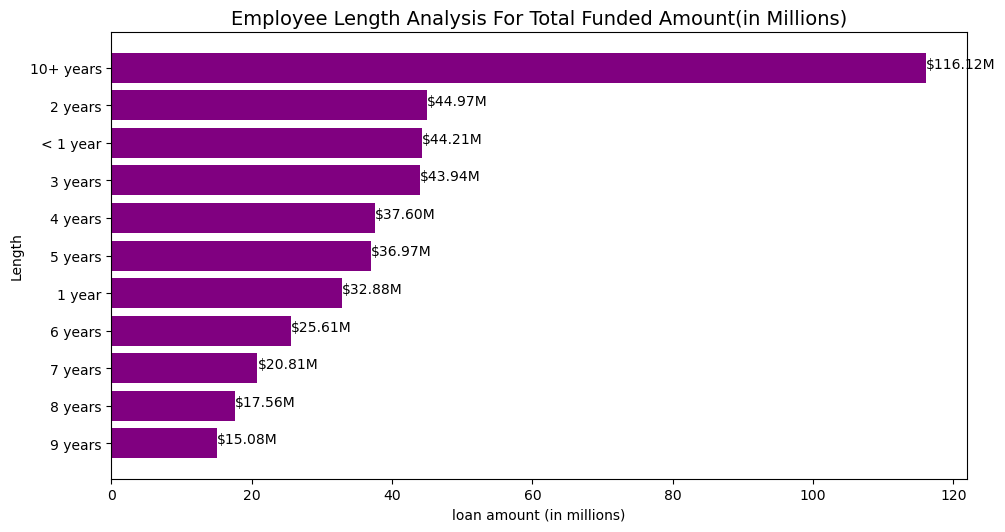

In [30]:
total_funded_by_employee_length = df.groupby('emp_length')['loan_amount'].sum().div(1000000).sort_values(ascending = True).reset_index(name = 'total_funded_amount')

fig, ax = plt.subplots(figsize = (10,5))
ax.barh(total_funded_by_employee_length['emp_length'], total_funded_by_employee_length['total_funded_amount'], color = 'purple')

for i,row in enumerate(total_funded_by_employee_length['total_funded_amount']):
    plt.text(row ,i, f'${row:,.2f}M')
plt.tight_layout()
plt.title('Employee Length Analysis For Total Funded Amount(in Millions)', fontsize = 14)
plt.ylabel('Length')
plt.xlabel('loan amount (in millions)')

Text(0.5, 25.722222222222214, 'payment amount (in millions)')

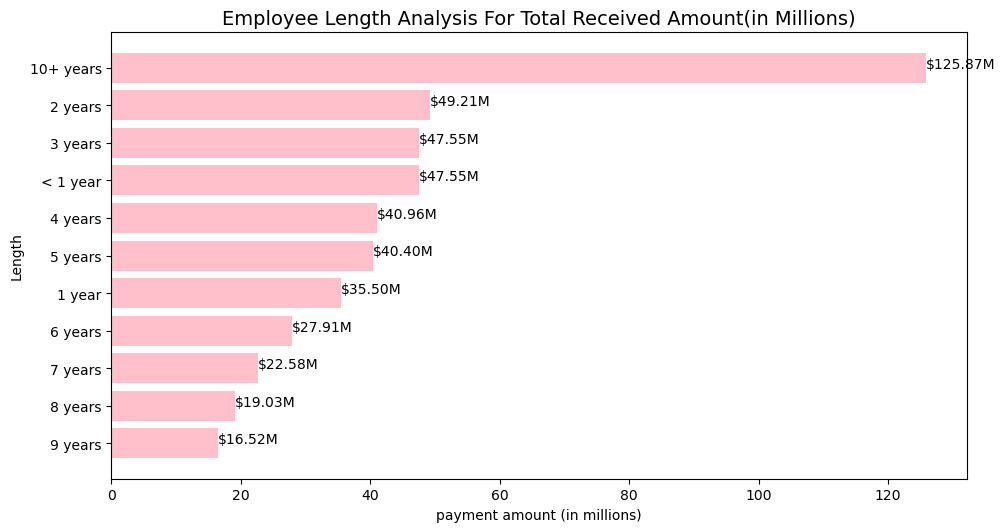

In [31]:
total_received_by_employee_length = df.groupby('emp_length')['total_payment'].sum().div(1000000).sort_values(ascending = True).reset_index(name = 'total_received_amount')

fig, ax = plt.subplots(figsize = (10,5))
ax.barh(total_received_by_employee_length['emp_length'], total_received_by_employee_length['total_received_amount'], color = 'pink')

for i,row in enumerate(total_received_by_employee_length['total_received_amount']):
    plt.text(row ,i, f'${row:,.2f}M')
plt.tight_layout()
plt.title('Employee Length Analysis For Total Received Amount(in Millions)', fontsize = 14)
plt.ylabel('Length')
plt.xlabel('payment amount (in millions)')

Text(0.5, 25.722222222222214, 'applications amount')

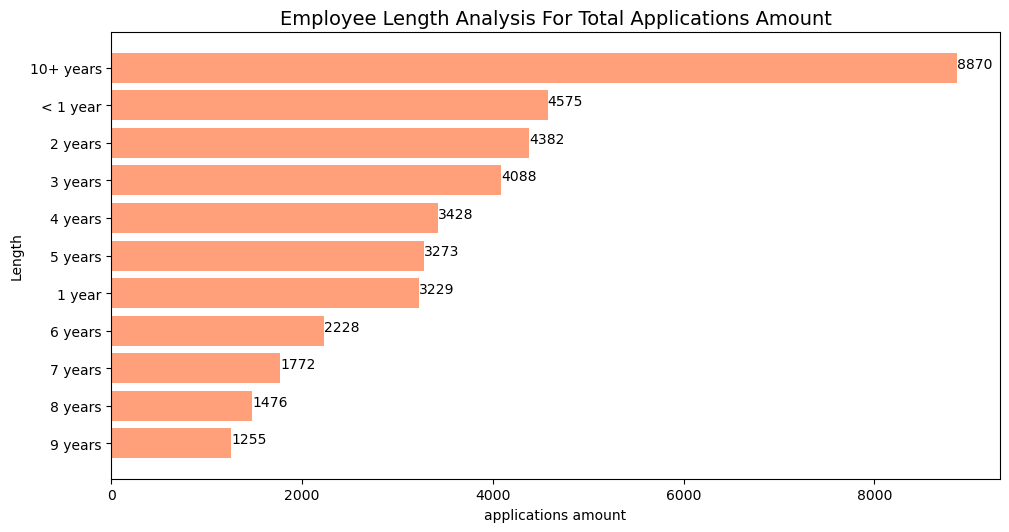

In [32]:
total_applications_by_employee_length = df.groupby('emp_length')['id'].count().sort_values(ascending = True).reset_index(name = 'total_applications')

fig, ax = plt.subplots(figsize = (10,5))
ax.barh(total_applications_by_employee_length['emp_length'], total_applications_by_employee_length['total_applications'], color = 'lightsalmon')

for i,row in enumerate(total_applications_by_employee_length['total_applications']):
    plt.text(row ,i, f'{row}')
plt.tight_layout()
plt.title('Employee Length Analysis For Total Applications Amount', fontsize = 14)
plt.ylabel('Length')
plt.xlabel('applications amount')

### LOAN PURPOSE BY TOTAL FUNDED AMOUNT

Text(0.5, 25.722222222222214, 'Loan amount (in millions)')

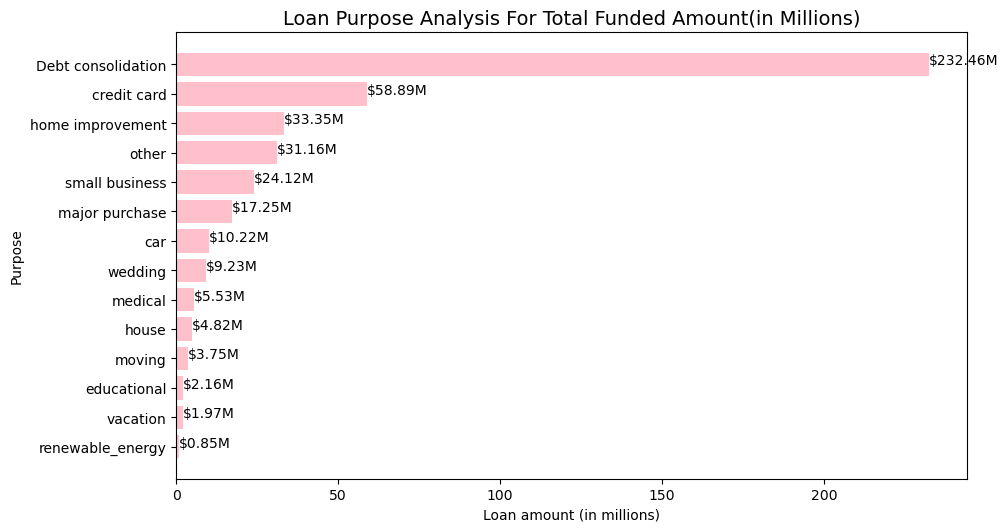

In [33]:
total_funded_by_purpose = df.groupby('purpose')['loan_amount'].sum().div(1000000).sort_values(ascending = True).reset_index(name = 'total_funded_amount')

fig, ax = plt.subplots(figsize = (10,5))
ax.barh(total_funded_by_purpose['purpose'], total_funded_by_purpose['total_funded_amount'], color = 'pink')

for i,row in enumerate(total_funded_by_purpose['total_funded_amount']):
    plt.text(row ,i, f'${row:,.2f}M')
plt.tight_layout()
plt.title('Loan Purpose Analysis For Total Funded Amount(in Millions)', fontsize = 14)
plt.ylabel('Purpose')
plt.xlabel('Loan amount (in millions)')

Text(0.5, 25.722222222222214, 'Payment amount (in millions)')

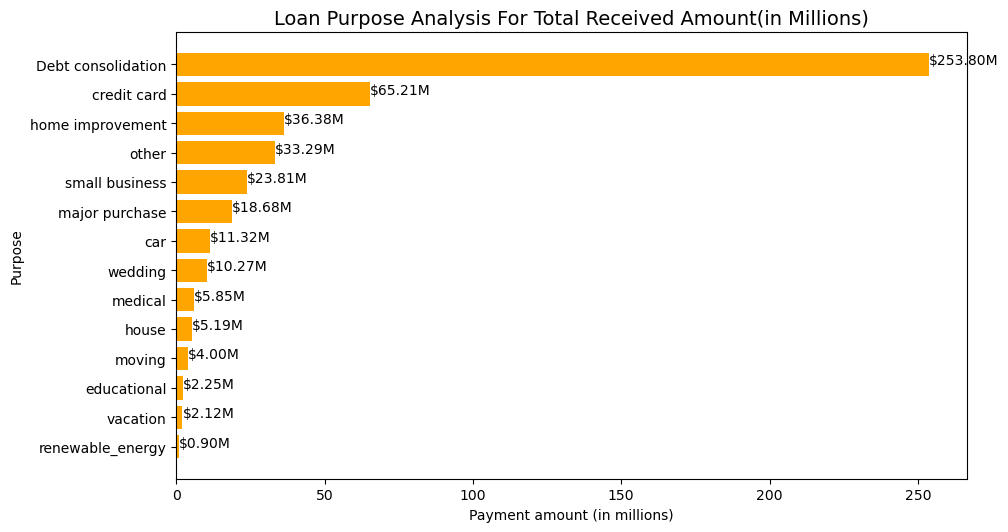

In [34]:
total_received_by_purpose = df.groupby('purpose')['total_payment'].sum().div(1000000).sort_values(ascending = True).reset_index(name = 'total_received_amount')

fig, ax = plt.subplots(figsize = (10,5))
ax.barh(total_received_by_purpose['purpose'], total_received_by_purpose['total_received_amount'], color = 'orange')

for i,row in enumerate(total_received_by_purpose['total_received_amount']):
    plt.text(row ,i, f'${row:,.2f}M')
plt.tight_layout()
plt.title('Loan Purpose Analysis For Total Received Amount(in Millions)', fontsize = 14)
plt.ylabel('Purpose')
plt.xlabel('Payment amount (in millions)')

Text(0.5, 25.722222222222214, 'Application')

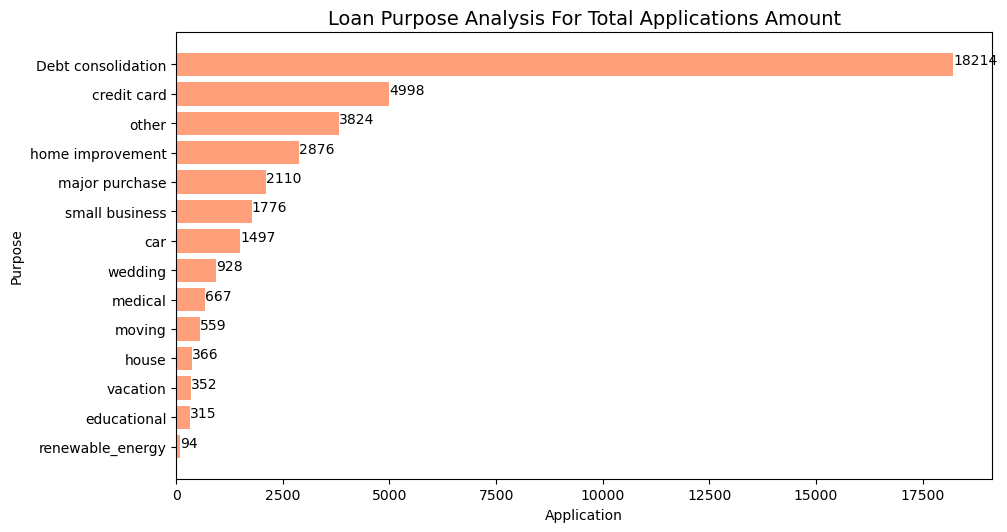

In [35]:
total_applications_by_purpose = df.groupby('purpose')['id'].count().sort_values(ascending = True).reset_index(name = 'total_applications')

fig, ax = plt.subplots(figsize = (10,5))
ax.barh(total_applications_by_purpose['purpose'], total_applications_by_purpose['total_applications'], color = 'lightsalmon')

for i,row in enumerate(total_applications_by_purpose['total_applications']):
    plt.text(row ,i, row)
plt.tight_layout()
plt.title('Loan Purpose Analysis For Total Applications Amount', fontsize = 14)
plt.ylabel('Purpose')
plt.xlabel('Application')

# Home ownership by Total Funded Amount

In [36]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE'], dtype=object)

In [37]:
home_funding = df.groupby('home_ownership')['loan_amount'].sum().reset_index()
home_funding['loan_amount_million'] = home_funding['loan_amount'].div(1000000).round(2)

fig = px.treemap(
    home_funding,
    path = ['home_ownership'],
    values= 'loan_amount_million',
    color= 'loan_amount_million',
    color_continuous_scale= 'Blues',
    title = 'Total funded amount by home ownership (millions)$'
)

fig.show()